In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

In [27]:
#read data
df = pd.read_csv(r'C:\Users\Michal\Desktop\Portfolio_Projects\Analyze_my_finance\data\last_month.CSV', sep=';', \
    skiprows=1, encoding= 'unicode_escape', usecols=[0, 2, 3, 4, 5], index_col=0)
df.head(5)

,Nazwa nadawcy,Nazwa odbiorcy,Szczegó³y transakcji,Kwota operacji
Data transakcji,,,,
10.10.2022,NaN,Aaa Paula,prezent,-150
02.10.2022,NaN,Dominik,za ubezpieczenie bu³a,-121
04.10.2022,NaN,JULCIA,Przelew na telefon BLIK,-500
22.10.2022,JULIA,NaN,Przelew na telefon ...,3
17.10.2022,MACHNIK,NaN,YouTube,36


In [28]:
# name columns and index
df.index.name = 'Date'
df.columns = ['Sender', 'Receiver', 'Details', 'Amount']
df.head(5)

,Sender,Receiver,Details,Amount
Date,,,,
10.10.2022,NaN,Aaa Paula,prezent,-150
02.10.2022,NaN,Dominik,za ubezpieczenie bu³a,-121
04.10.2022,NaN,JULCIA,Przelew na telefon BLIK,-500
22.10.2022,JULIA,NaN,Przelew na telefon ...,3
17.10.2022,MACHNIK,NaN,YouTube,36


In [29]:
# creating new expence column which will be used for spending calculations
df['Expence'] = df['Amount'].str.contains('-')

# converting Amount to correct format
df['Amount'] = df['Amount'].map(lambda x: x.lstrip('-'))
df['Amount'] = df['Amount'].apply(lambda x: x.replace(',', '.'))
df['Amount'] = pd.to_numeric(df['Amount'])

# converting two columuns to str type 
df['Receiver'] = df['Receiver'].astype(str)
df['Details'] = df['Details'].astype(str)

In [30]:
# making category
df['Category'] = False

Travel_service = ['Mobile Traffic DATA Sp. z o.o.', 'PayPro S.A.']
Subscription = ['YouTubePremium', 'analizy']
Food = ['BIEDRONKA', 'LIDL', 'ZABKA']
Blik = ['Dominik', 'Paula', 'Julia', 'JULCIA']
Entertainment = ['Restaurant', 'McDonalds', 'PARKIN']
Auto = ['PARKIN', 'Myjnia']

category = {'Travel_service': Travel_service,
    'Subscription': Subscription,
    'Food': Food,
    'Blik': Blik,
    'Entertainment': Entertainment,
    'Auto': Auto}

In [31]:
#function that assigns row to correct category 
def find_name_category(i):
    for category_name in category:
        for subcategory in category[category_name]:       
                if subcategory in df['Receiver'].iloc[i] \
                    or subcategory in df['Details'].iloc[i]\
                    or subcategory in df['Receiver'].iloc[i]:
                    df['Category'].iloc[i] = category_name
                    break

#loop assigns rows to category 
for i in range(len(df['Category'])):
    if df['Category'].iloc[i] == False:
        if df['Expence'].iloc[i]:
            find_name_category(i)
        else:
            df['Category'].iloc[i] = 'Income'

df['Category'] = df['Category'].replace(False, 'Other')
df.head(10)

,Sender,Receiver,Details,Amount,Expence,Category
Date,,,,,,
10.10.2022,NaN,Aaa Paula,prezent,150.00,True,Blik
02.10.2022,NaN,Dominik,za ubezpieczenie bu³a,121.00,True,Blik
04.10.2022,NaN,JULCIA,Przelew na telefon BLIK,500.00,True,Blik
22.10.2022,JULIA,nan,Przelew na telefon ...,3.00,False,Income
17.10.2022,MACHNIK,nan,YouTube,36.00,False,Income
14.10.2022,NaN,nan,WYPLATA CASHBACKPROGRAM:,9.47,False,Income
12.10.2022,PayPro S.A.,nan,BLIK - zwrot p³atnoc,33.32,False,Income
11.10.2022,PayPro S.A.,nan,BLIK - zwrot p³atnoci,28.32,False,Income
22.10.2022,NaN,Mobile Traffic DATA Sp. z o.o.,nan,2.00,True,Travel_service


In [32]:
# Calculating spending per category
spending_cat = df.groupby(['Category'])['Amount'].sum().sort_values()

# Cancel return money from PKP 
for i in range(len(df['Category'])):
    if df['Expence'].iloc[i] == False and 'PayPro S.A.' in df['Details'].iloc[i]:
        spending_cat['Travel_service'] -= df['Amount'].iloc[i]
        spending_cat['Income'] -= df['Amount'].iloc[i]
        
spending_cat

Category
Auto               15.00
Other              31.00
Entertainment     103.90
Income            110.11
Subscription      125.99
Travel_service    300.10
Food              401.00
Blik              771.00
Name: Amount, dtype: float64

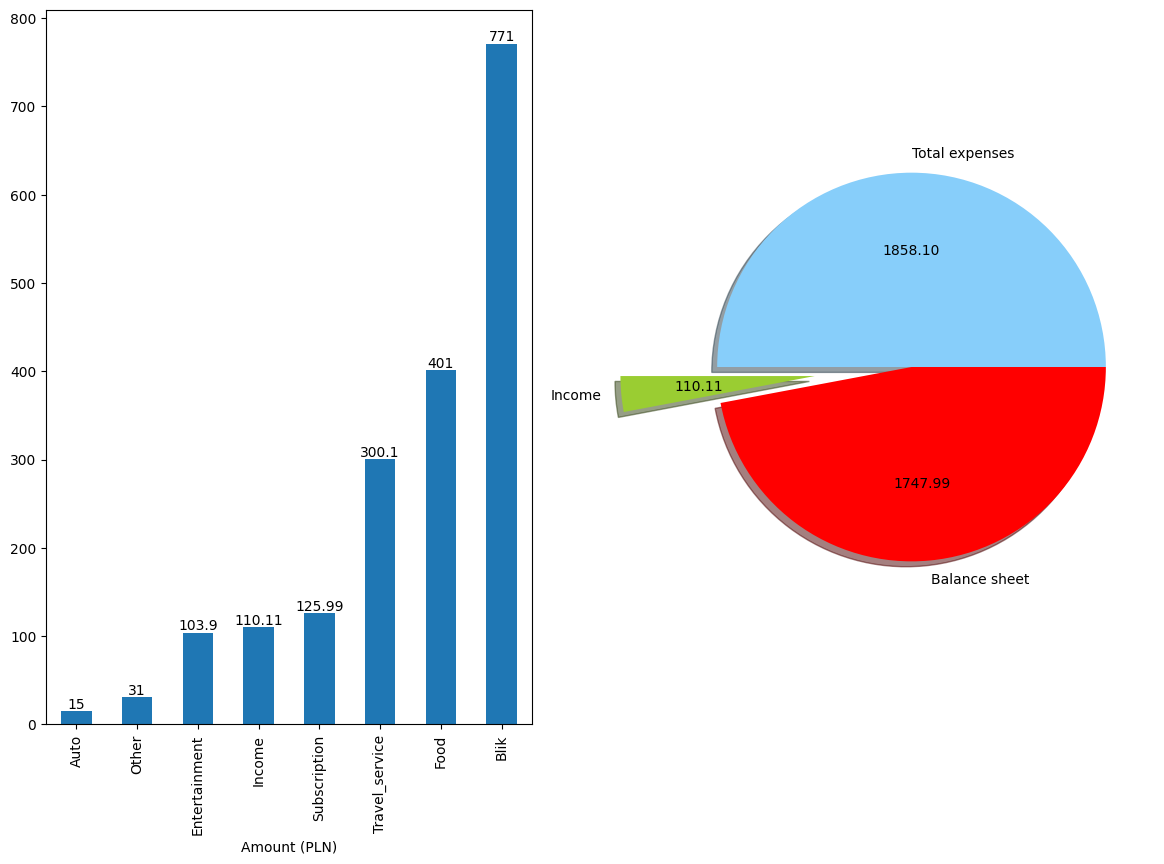

In [33]:
# Creating charts
# Creating bar plot
fig, ax = plt.subplots(1, 2, figsize= (12,9))
spending_cat.plot.bar(ax=ax[0])
ax[0].set_xlabel('Amount (PLN)', size=10)
ax[0].set_ylabel('')

# Setting values on the bars
for bars in ax[0].containers:
   ax[0].bar_label(bars)

# Creating pie plot
Total_expenses = spending_cat.sum()
Income = spending_cat['Income']
Balance_sheet = Total_expenses - Income

y = np.array([Total_expenses, Income, Balance_sheet])
mylabels = ["Total expenses", "Income", "Balance sheet"]
mycolors = ['lightskyblue', "yellowgreen","red"]
myexplode = [0, 0.5, 0]

ax[1].pie(y, labels=mylabels, colors = mycolors, explode = myexplode, \
    autopct= lambda x: '{:.2f}'.format(x*spending_cat.sum()/50), shadow = True)

fig.tight_layout(pad=2.0)
plt.show()